# Commodity Channel Index (CCI)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:commodity_channel_index_cci

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'TCS.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,2168.000000,2183.899902,2154.000000,2167.600098,2034.032471,1354908
2020-01-02 00:00:00+05:30,2179.949951,2179.949951,2149.199951,2157.649902,2024.695557,2380752
2020-01-03 00:00:00+05:30,2164.000000,2223.000000,2164.000000,2200.649902,2065.045410,4655761
2020-01-06 00:00:00+05:30,2205.000000,2225.949951,2187.899902,2200.449951,2064.858398,3023209
2020-01-07 00:00:00+05:30,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317


In [3]:
n = 20
df['TP'] = (df['High'] + df['Low'] + df['Adj Close'])/3
df['SMA_TP'] = df['TP'].rolling(n).mean()
df['SMA_STD'] = df['TP'].rolling(n).std()
df['CCI'] = (df['TP'] - df['SMA_TP']) / (0.015*df['SMA_STD'])
df = df.drop(['TP', 'SMA_TP', 'SMA_STD'],axis=1)

In [4]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume,CCI
Date,,,,,,,
2020-01-01 00:00:00+05:30,2168.000000,2183.899902,2154.000000,2167.600098,2034.032471,1354908,NaN
2020-01-02 00:00:00+05:30,2179.949951,2179.949951,2149.199951,2157.649902,2024.695557,2380752,NaN
2020-01-03 00:00:00+05:30,2164.000000,2223.000000,2164.000000,2200.649902,2065.045410,4655761,NaN
2020-01-06 00:00:00+05:30,2205.000000,2225.949951,2187.899902,2200.449951,2064.858398,3023209,NaN
2020-01-07 00:00:00+05:30,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317,NaN
2020-01-08 00:00:00+05:30,2205.000000,2260.000000,2202.050049,2255.250000,2116.281494,5197454,NaN
2020-01-09 00:00:00+05:30,2248.750000,2251.949951,2210.000000,2214.350098,2077.901855,3734173,NaN
2020-01-10 00:00:00+05:30,2228.000000,2234.000000,2208.000000,2213.550049,2077.150879,1915807,NaN
2020-01-13 00:00:00+05:30,2217.850098,2218.949951,2184.699951,2190.350098,2055.380615,2843893,NaN


Text(0.5, 0, 'Date')

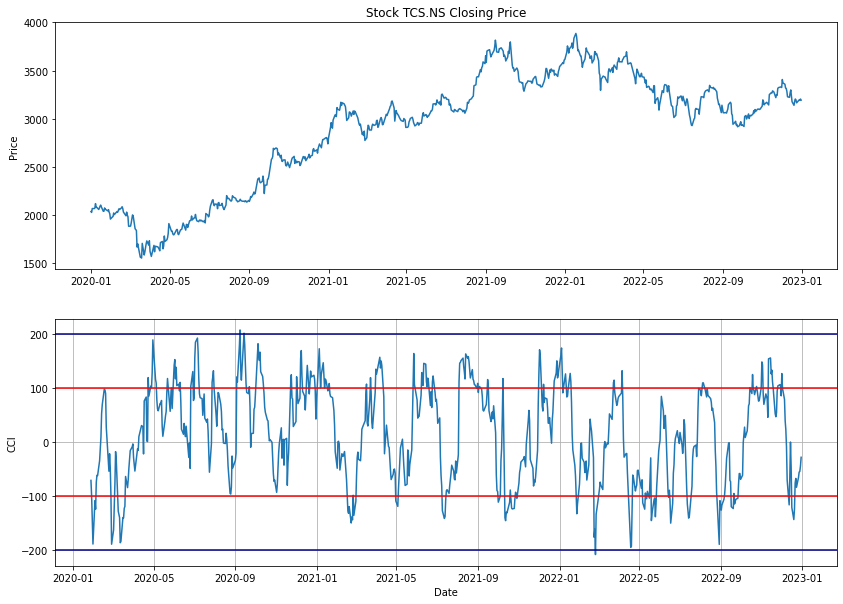

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CCI'], label='Commodity Channel Index')
ax2.axhline(y=100, color='red')
ax2.axhline(y=-100, color='red')
ax2.axhline(y=200, color='darkblue')
ax2.axhline(y=-200, color='darkblue')
ax2.grid()
ax2.set_ylabel('CCI')
ax2.set_xlabel('Date')

## Commodity Channel Index

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CCI,VolumePositive
0,18261.770833,2168.000000,2183.899902,2154.000000,2167.600098,2034.032471,1354908,NaN,False
1,18262.770833,2179.949951,2179.949951,2149.199951,2157.649902,2024.695557,2380752,NaN,False
2,18263.770833,2164.000000,2223.000000,2164.000000,2200.649902,2065.045410,4655761,NaN,False
3,18266.770833,2205.000000,2225.949951,2187.899902,2200.449951,2064.858398,3023209,NaN,False
4,18267.770833,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317,NaN,False


Text(0.5, 0, 'Date')

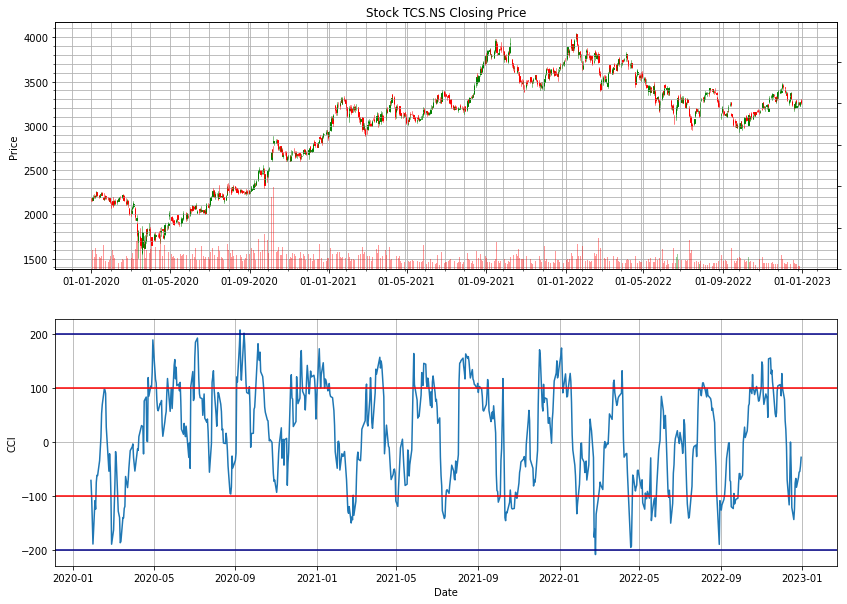

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CCI'], label='Commodity Channel Index')
ax2.axhline(y=100, color='red')
ax2.axhline(y=-100, color='red')
ax2.axhline(y=200, color='darkblue')
ax2.axhline(y=-200, color='darkblue')
ax2.grid()
ax2.set_ylabel('CCI')
ax2.set_xlabel('Date')